### Qinhui Xu 09/13/2018

#### Data Source: https://www.kaggle.com/mlg-ulb/creditcardfraud

### There are 31 variables in total in the dataset, variable Class is target variable. And target variable is a really imbalanced one, which happens a lot in our real life. 

#### It is a binary classification problem, therefore the following modeling methods will be used: 
#### 1. Logistic Regression
#### 2. Naive Bayes Classifier
#### 3. Gradient Boosting Machine
#### 4. Random Forest Model
#### 5. XGBoost

#### In this case, it is easy to get a high specificity (True Negative Rate) but it is hard to get a high sensitivity (True Positive Rate), which is more important for detecting fraud.
#### Packages: pandas, numpy, h2o, scikit-learn will be used for data exploration/transformation and modeling.

##### Reference

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score,accuracy_score
from sklearn.metrics import confusion_matrix


C:\Users\Tiffany Xu\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv("C:/Users/Tiffany Xu/Documents/MachineLearningStudy/DeepLearning/creditcard.csv")

### Data Exploration

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


std can show the variance of each Independent Variable from the dataset

In [4]:
df_info = df.describe()
df_info.iloc[:, np.argsort(df_info.loc['std'])]

,Class,V28,V27,V26,V25,V24,V23,V22,V21,V20,...,V8,V7,V6,V5,V4,V3,V2,V1,Amount,Time
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,0.001727,-1.206049e-16,-3.660161e-16,1.699104e-15,1.453003e-15,4.458112e-15,5.367590e-16,7.959909e-16,1.537294e-16,5.085503e-16,...,-1.927028e-16,-1.694249e-15,2.010663e-15,-1.552563e-15,2.782312e-15,-8.769071e-15,5.688174e-16,3.919560e-15,88.349619,94813.859575
std,0.041527,3.300833e-01,4.036325e-01,4.822270e-01,5.212781e-01,6.056471e-01,6.244603e-01,7.257016e-01,7.345240e-01,7.709250e-01,...,1.194353e+00,1.237094e+00,1.332271e+00,1.380247e+00,1.415869e+00,1.516255e+00,1.651309e+00,1.958696e+00,250.120109,47488.145955
min,0.000000,-1.543008e+01,-2.256568e+01,-2.604551e+00,-1.029540e+01,-2.836627e+00,-4.480774e+01,-1.093314e+01,-3.483038e+01,-5.449772e+01,...,-7.321672e+01,-4.355724e+01,-2.616051e+01,-1.137433e+02,-5.683171e+00,-4.832559e+01,-7.271573e+01,-5.640751e+01,0.000000,0.000000
25%,0.000000,-5.295979e-02,-7.083953e-02,-3.269839e-01,-3.171451e-01,-3.545861e-01,-1.618463e-01,-5.423504e-01,-2.283949e-01,-2.117214e-01,...,-2.086297e-01,-5.540759e-01,-7.682956e-01,-6.915971e-01,-8.486401e-01,-8.903648e-01,-5.985499e-01,-9.203734e-01,5.600000,54201.500000
50%,0.000000,1.124383e-02,1.342146e-03,-5.213911e-02,1.659350e-02,4.097606e-02,-1.119293e-02,6.781943e-03,-2.945017e-02,-6.248109e-02,...,2.235804e-02,4.010308e-02,-2.741871e-01,-5.433583e-02,-1.984653e-02,1.798463e-01,6.548556e-02,1.810880e-02,22.000000,84692.000000
75%,0.000000,7.827995e-02,9.104512e-02,2.409522e-01,3.507156e-01,4.395266e-01,1.476421e-01,5.285536e-01,1.863772e-01,1.330408e-01,...,3.273459e-01,5.704361e-01,3.985649e-01,6.119264e-01,7.433413e-01,1.027196e+00,8.037239e-01,1.315642e+00,77.165000,139320.500000
max,1.000000,3.384781e+01,3.161220e+01,3.517346e+00,7.519589e+00,4.584549e+00,2.252841e+01,1.050309e+01,2.720284e+01,3.942090e+01,...,2.000721e+01,1.205895e+02,7.330163e+01,3.480167e+01,1.687534e+01,9.382558e+00,2.205773e+01,2.454930e+00,25691.160000,172792.000000


In [5]:
df.shape

(284807, 31)

In [6]:
df_class = df['Class'].value_counts()
df_class = pd.DataFrame(df_class)

In [7]:
print("The percentage of fraud record is",df_class["Class"][1]/len(df)*100)

The percentage of fraud record is 0.1727485630620034


#### There are 294807 rows and 31 columns in the dataset. Targe variable is really imbalanced one as only 0.17% of the records is fraud. Then, we will look at the distribution of independent variables for fraud transactions and non-fraud transactions seperately.

In [8]:
df_notfraud = df[df["Class"]==0]
df_fraud = df[df["Class"]==1]

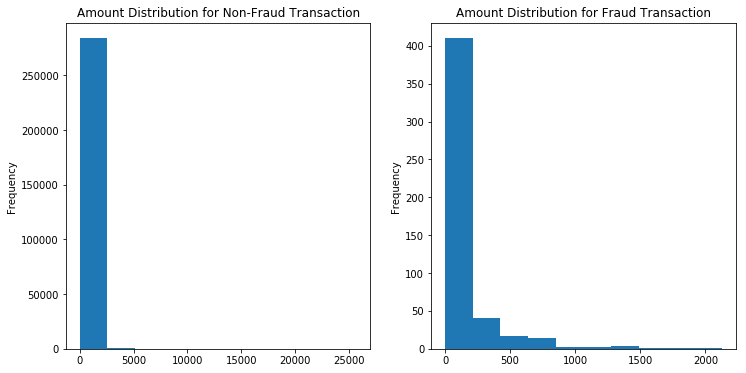

In [9]:
plt.figure(figsize = (12,6))
plt.subplot(121)
df_notfraud["Amount"].plot.hist(title = "Amount Distribution for Non-Fraud Transaction")
plt.subplot(122)
df_fraud["Amount"].plot.hist(title = "Amount Distribution for Fraud Transaction")

We can see that most of the Amount distribution is located in range 0 - 2500. So I will make a subset of non-fraud dataframe and look into the distribution of Amount again.

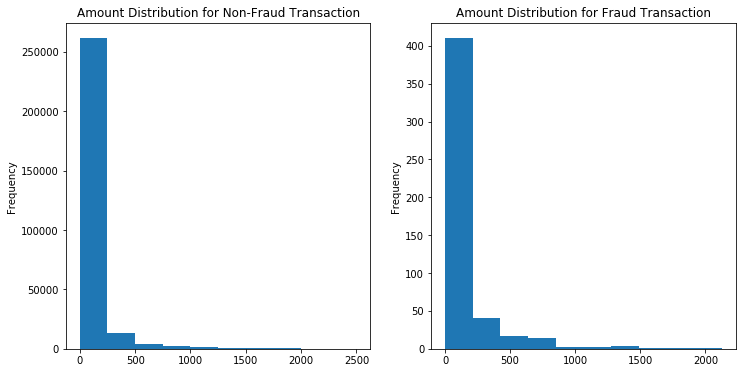

In [10]:
df_notfraud_subset = df_notfraud[df_notfraud["Amount"]<2500]
plt.figure(figsize = (12,6))
plt.subplot(121)
df_notfraud_subset["Amount"].plot.hist(title = "Amount Distribution for Non-Fraud Transaction")
plt.subplot(122)
df_fraud["Amount"].plot.hist(title = "Amount Distribution for Fraud Transaction")

After we do subset for non-fraud transactions, we can see that there is no specific pattern for the fraud transactions in Amount Distribution.

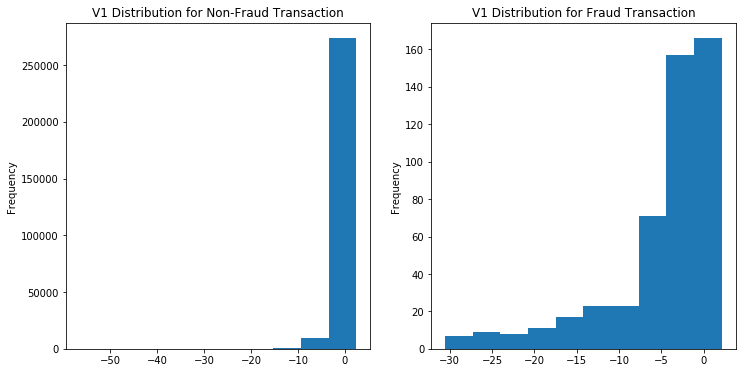

In [11]:
plt.figure(figsize = (12,6))
plt.subplot(121)
df_notfraud["V1"].plot.hist(title = "V1 Distribution for Non-Fraud Transaction")
plt.subplot(122)
df_fraud["V1"].plot.hist(title = "V1 Distribution for Fraud Transaction")

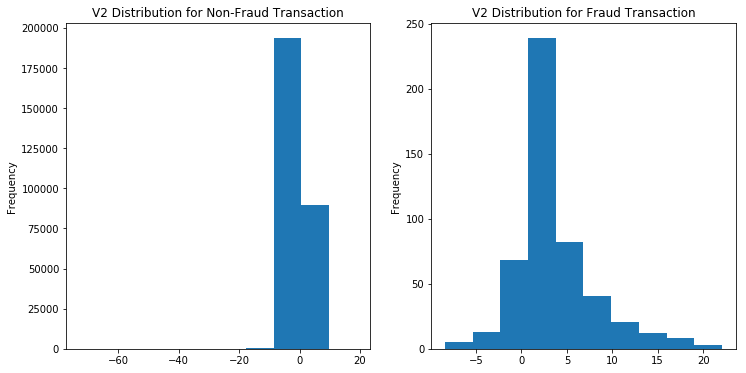

In [12]:
plt.figure(figsize = (12,6))
plt.subplot(121)
df_notfraud["V2"].plot.hist(title = "V2 Distribution for Non-Fraud Transaction")
plt.subplot(122)
df_fraud["V2"].plot.hist(title = "V2 Distribution for Fraud Transaction")

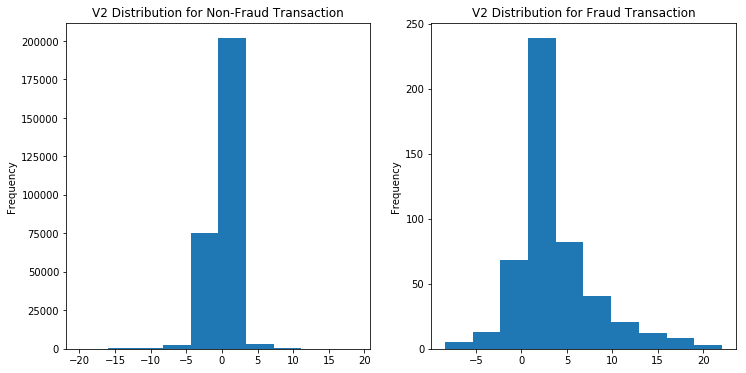

In [13]:
df_notfraud_subset = df_notfraud[df_notfraud["V2"]>-20]
plt.figure(figsize = (12,6))
plt.subplot(121)
df_notfraud_subset["V2"].plot.hist(title = "V2 Distribution for Non-Fraud Transaction")
plt.subplot(122)
df_fraud["V2"].plot.hist(title = "V2 Distribution for Fraud Transaction")

### Deal With Imbalance in the Dataset

First, lets build a simple logistic regression model and look at confusion matrix before dealing with imbalance.

In [14]:
df['normalized_amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df = df.drop(['Amount','Time'], axis=1)
X = df.loc[:,df.columns != 'Class']
y = df.loc[:,df.columns == 'Class']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [15]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("Sensitivity/Recall is:",tp/(tp+fn))
print("Specificity is:",tn/(tn+fp))

C:\Users\Tiffany Xu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Sensitivity/Recall is: 0.6190476190476191
Specificity is: 0.9998593134496342


Compared to Specificity, Recall is pretty low,which is only a little bit better than random guess.

So, we need to deal with imbalanced data. 
What can we do to deal with this problem? 1) We can decrease the size of majority part. 2) We can increase the size of minority part.
The first option is called *Undersamplint*, and the second option is called *Oversampling*.

#### Undersampling - reduce the size of majority (non-fraud) to match the minority (fraud).

1. Random Undersampling Try

In [16]:
df_notfraud_sample = df_notfraud.sample(len(df_fraud))
df_random_undersample = pd.concat([df_notfraud_sample,df_fraud],axis=0)

In [17]:
df_random_undersample['normalized_amount'] = StandardScaler().fit_transform(df_random_undersample['Amount'].values.reshape(-1,1))
df_random_undersample = df_random_undersample.drop(['Amount','Time'], axis=1)
X_random_under = df_random_undersample.loc[:,df_random_undersample.columns != 'Class']
y_random_under = df_random_undersample.loc[:,df_random_undersample.columns == 'Class']
X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X_random_under,y_random_under,test_size = 0.3, random_state = 0)

lr = LogisticRegression()
lr.fit(X_under_train,y_under_train)
y_pred = lr.predict(X_under_test)
tn, fp, fn, tp = confusion_matrix(y_under_test, y_pred).ravel()
print("Sensitivity/Recall is:",tp/(tp+fn))
print("Specificity is:",tn/(tn+fp))

Sensitivity/Recall is: 0.87248322147651
Specificity is: 0.9863945578231292


C:\Users\Tiffany Xu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Using random undersampling,we can increase sensitivity.But random undersampling will cause the loss of information.
But we can do undersampling based on clusters. In this way, we can extract a specific number of cluster centroid, which represent characteristics of each cluster to prevent information loss.
2. Cluster based Undersampling

In [18]:
import h2o
h2o.init()
import imp
from h2o.estimators.kmeans import H2OKMeansEstimator

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.171-b11, mixed mode)
  Starting server from C:\Users\Tiffany Xu\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\TIFFAN~1\AppData\Local\Temp\tmpisqnjf8x
  JVM stdout: C:\Users\TIFFAN~1\AppData\Local\Temp\tmpisqnjf8x\h2o_Tiffany_Xu_started_from_python.out
  JVM stderr: C:\Users\TIFFAN~1\AppData\Local\Temp\tmpisqnjf8x\h2o_Tiffany_Xu_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,06 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.20.0.2
H2O cluster version age:,2 months and 29 days
H2O cluster name:,H2O_from_python_Tiffany_Xu_ltvohf
H2O cluster total nodes:,1
H2O cluster free memory:,3.492 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [30]:
df_kmeans_notfraud = df_notfraud.drop(['Time','Class'], axis=1)
hf = h2o.H2OFrame(df_kmeans_notfraud)

C:\Users\Tiffany Xu\Anaconda3\lib\site-packages\h2o\utils\shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [31]:
cls = H2OKMeansEstimator(k=len(df_fraud), standardize=True)
cls.train(x=hf.columns, training_frame=hf)

kmeans Model Build progress: |████████████████████████████████████████████| 100%


In [33]:
df_centers = pd.DataFrame(cls.centers())
df_centers.columns = hf.columns

In [34]:
df_centers.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.419490,0.017010,-0.070688,0.401104,-0.302427,-0.741899,0.031414,-0.122099,0.143667,-0.034498,...,-0.094188,-0.219809,-0.661218,0.157199,0.125153,0.035201,0.271488,-0.052461,-0.006771,24.972286
1,-35.548539,-31.850484,-48.325589,15.304184,-113.743307,73.301626,120.589494,-27.347360,-3.872425,-12.005487,...,-54.497720,-21.620120,5.712303,-1.581098,4.584549,4.554683,3.415636,31.612198,-15.430084,25691.160000
2,-56.407510,-72.715728,-6.605265,16.491217,34.801666,-26.160506,-19.399981,-1.501300,6.967698,9.537780,...,-12.360962,-6.266878,-1.272167,7.893082,0.767805,5.376595,0.163672,-8.358317,33.847808,1201.830000
3,-36.802320,-63.344698,-20.645794,16.715537,-20.672064,7.694002,24.956587,-4.730111,-2.687312,-8.423404,...,39.420904,11.455313,-10.933144,-17.173665,1.180700,-7.025783,-2.534330,-3.602479,3.450224,19656.530000
4,-14.904340,12.793880,-7.888739,0.512373,-7.661829,16.614054,-31.764946,-73.216718,-6.290730,-14.741096,...,16.756448,-34.830382,10.503090,4.245073,-1.412813,-0.730374,0.133557,-0.394370,0.942177,500.000000
